In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/Iris.csv


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_csv("../input/iris-dataset/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**cleaning of data ****

In [4]:
print(df.shape)

(150, 6)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
#numeric columns from datasets
df_numeric_col=df.select_dtypes(include=[np.number])
numeric_cols=df_numeric_col.columns.values
print(numeric_cols)

['Id' 'SepalLengthCm' 'SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm']


In [10]:
#non-numeric columns from datasets 
df_non_numeric_col=df.select_dtypes(exclude=[np.number])
non_numeric_cols=df_non_numeric_col.columns.values
print(non_numeric_cols)

['Species']


In [11]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


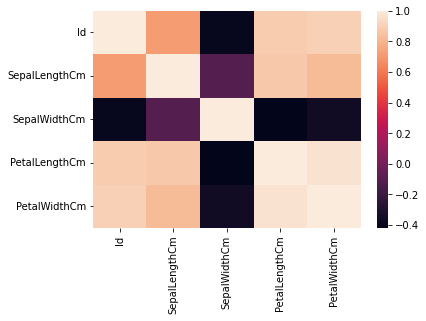

In [12]:
sns.heatmap(df.corr())
plt.show()

now we will find missing values from data 

In [13]:
#missing data through percentage list method 
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))

Id - 0%
SepalLengthCm - 0%
SepalWidthCm - 0%
PetalLengthCm - 0%
PetalWidthCm - 0%
Species - 0%


In [14]:
df['Id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150])

In [15]:
df['SepalLengthCm'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [16]:
df['SepalWidthCm'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [17]:
df['PetalLengthCm'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [18]:
df['PetalWidthCm'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [19]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'SepalLengthCm'}>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}>,
        <AxesSubplot:title={'center':'PetalLengthCm'}>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}>, <AxesSubplot:>]],
      dtype=object)

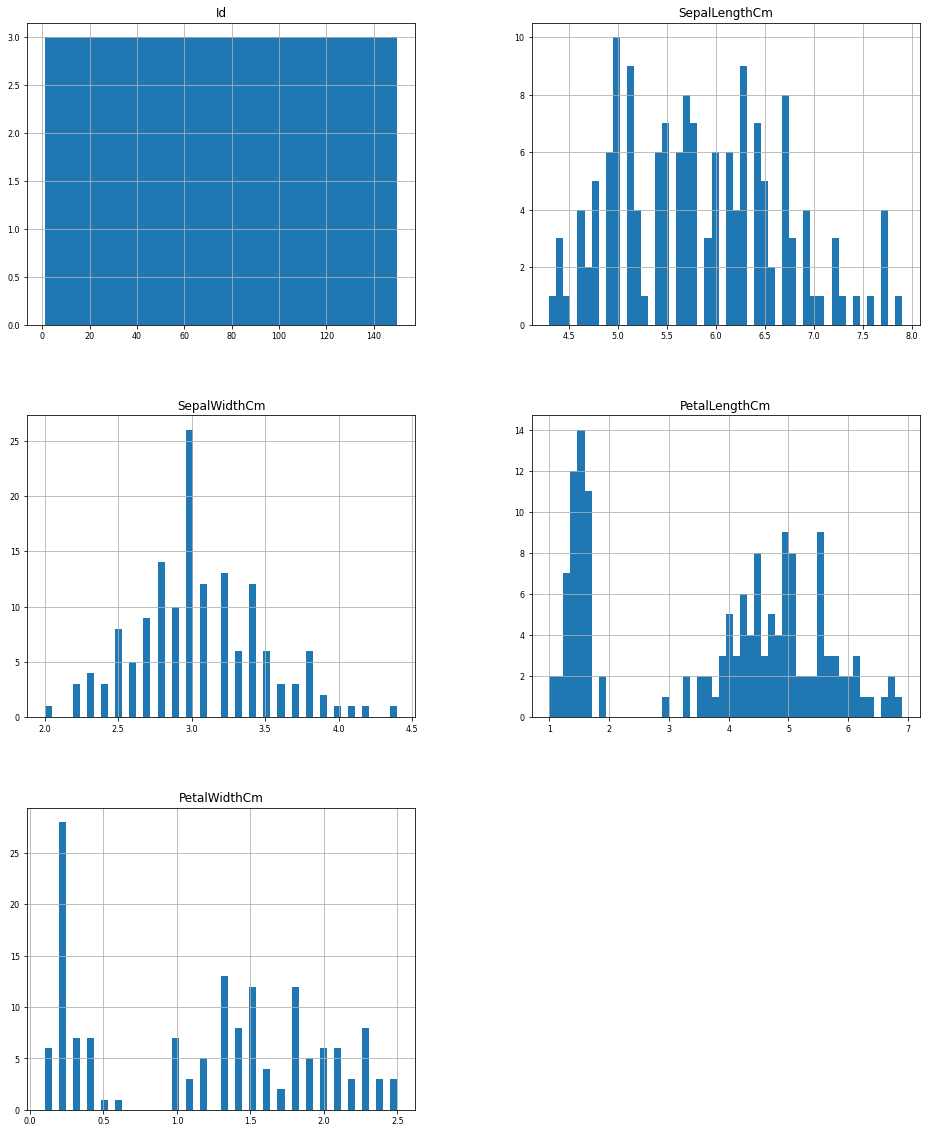

In [20]:
df.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)

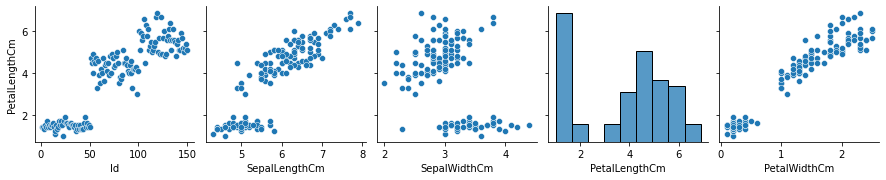

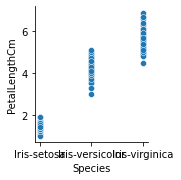

In [21]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['PetalLengthCm'])

Text(0.5, 1.0, 'Correlation heatmap ')

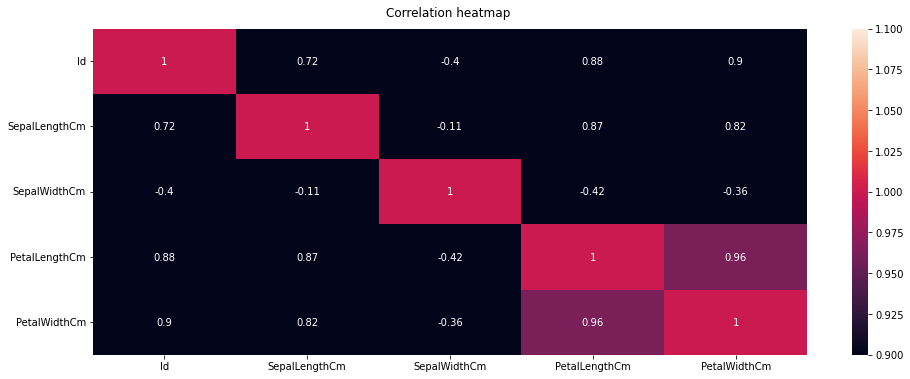

In [22]:
plt.figure(figsize=(16,6))
heatmap= sns.heatmap(df.corr(),vmin=1,vmax=1,annot=True)
heatmap.set_title('Correlation heatmap ', fontdict={'fontsize':12},pad=12)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

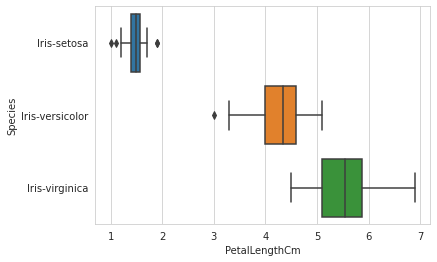

In [23]:
sns.set_style("whitegrid")
sns.boxplot(x='PetalLengthCm',y='Species',data=df)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Species'>

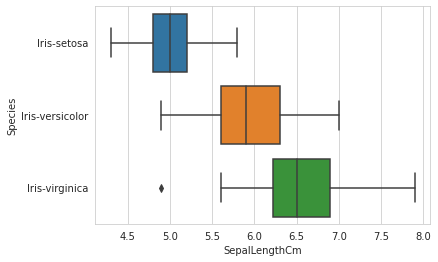

In [24]:
sns.set_style("whitegrid")
sns.boxplot(x='SepalLengthCm',y='Species',data=df)

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

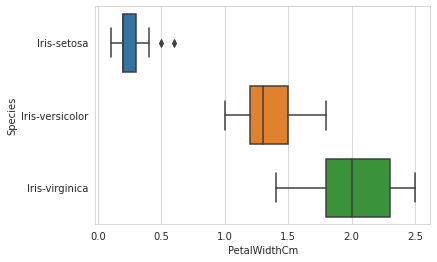

In [25]:
sns.set_style("whitegrid")
sns.boxplot(x='PetalWidthCm',y='Species',data=df)

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Species'>

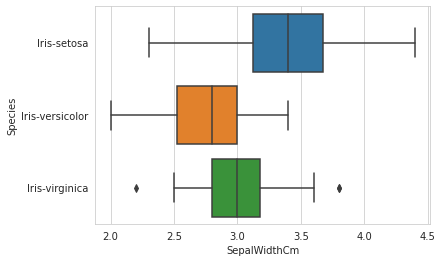

In [26]:
sns.set_style("whitegrid")
sns.boxplot(x='SepalWidthCm',y='Species',data=df)

**Decision Tree Classifier****

In [27]:
import pandas as pd
import numpy as np 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def printdata():
    print("Dataset Length: ",len(df))
    print("Dataset shape: ",df.shape)
    
    #printing dataset observations
    print("dataset: ",df.head())
    return df

#function to split dataset 
def splitdataset(df):
    #seperating target variables 
    x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
    y=df[['Species']]
         
    #spliting dataset in test and train dataset 
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100)
    
    return x,y,x_train,x_test,y_train,y_test

#function to perform training from gini_index
def train_using_gini(x_train,x_test,y_train):
    #creating classifier object 
    clf_gini=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)
    
    #performing training 
    clf_gini.fit(x_train,y_train)
    return clf_gini

#function to perform training with entropy 
def train_using_entropy(x_train,x_test,y_train):
    
    #decision tree with entropy 
    clf_entropy =DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
    
    #performing training 
    clf_entropy.fit(x_train,y_train)
    return clf_entropy

def prediction(x_test,clf_object):
    
    #prediction on test with giniIndex
    y_pred=clf_object.predict(x_test)
    print("predicted values: ")
    print(y_pred)
    return y_pred

#function to calculate accuracy 
def cal_accuracy(y_test,y_pred):
    print("Confusion matrix: ",
         confusion_matrix(y_test,y_pred))
    print("accuracy: ",
         accuracy_score(y_test,y_pred))
    print("report: ",
         classification_report(y_test,y_pred))
    
#driver code
def main():
    
    #building phase 
    data=df
    x,y,x_train,x_test,y_train,y_test= splitdataset(df)
    clf_gini=train_using_gini(x_train,x_test,y_train)
    
    #operational phase 
    print("results using gini index: ")
    
    #prediction using gini 
    y_pred_gini=prediction(x_test,clf_gini)
    cal_accuracy(y_test,y_pred_gini)
    

    
    # Calling main function
if __name__=="__main__":
    main()
       

results using gini index: 
predicted values: 
['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor']
Confusion matrix:  [[14  0  0]
 [ 0  9  1]
 [ 0  1 13]]
accuracy:  0.9473684210526315
report:                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.93      0.93      0.93        14

    